In [189]:
import fiona
import matplotlib.pyplot as plt
import os
from osgeo import gdal
import pandas as pd
import numpy as np
from rasterio.plot import show
import rasterio
import seaborn as sns
from scipy.stats import linregress
import re

In [195]:
def get_histogram(raster_path):
    info=gdal.Info(raster_path, reportHistograms=True)
    max_regex="STATISTICS_MAXIMUM=(?P<max>(-)?(\d+\.)?\d+(e[+-]\d+)?)"
    min_regex="STATISTICS_MINIMUM=(?P<min>(-)?(\d+\.)?\d+(e[+-]\d+)?)"
    hist_regex="\d+ buckets from (-)?(\d+\.)?\d+(e[+-]\d+)? to (-)?(\d+\.)?\d+(e[+-]\d+)?:[(\\n)\s]+(?P<hist>(\d+\s+)*)"
    max = float(re.search(max_regex, info).group('max'))
    min = float(re.search(min_regex, info).group('min'))
    hist_str = re.search(hist_regex, info).group('hist')
    #print(info)
    hist_values = [int(v) for v in hist_str.strip().split(' ')]
    #max = float(info[-6].split('=')[-1])
    #min = float(info[-4].split('=')[-1])
    bins=np.linspace(min,max,257)[:-1]
    print(min,max)
    #return info
    return bins, hist_values

In [202]:
shed_path="/home/jo/cub/research/data/hydrosheds_flow/d_hybas_na/hybas_na_lev03_v1c.shp"
out_dir = "/home/jo/cub/research/data/hydrosheds_flow/basins_files"

In [186]:
with fiona.open(shed_path, 'r') as shapefile:
    basins = [feature for feature in shapefile]
    

In [199]:
three_seconds = 0.000833333333333
pixel_sizes_a = [('6s', three_seconds*2),
                ('9s', three_seconds*3),
                ('15s', three_seconds*5),
                ('30s', three_seconds*10),
                ('60s', three_seconds*20),
                ('90s', three_seconds*30),
                ('150s', three_seconds*50),
                ('300s', three_seconds*100)]
pixel_sizes_m = [('100m', 100),
               ('150m', 150),
               ('200m', 200),
               ('300m', 300),
               ('500m', 500),
               ('750m', 750),
               ('1km', 1000),
               ('2lm', 2000),
               ('5km', 5000),
               ('10km', 10000),
               ('100km', 100000)]
#15343103

In [203]:
for basin in basins:
    basin_name=str(basin.properties['HYBAS_ID'])
    data_frames=[]
    for size in pixel_sizes_a:
        fname = "%s_acc_%s.tif" % (basin_name, size[0])
        print(fname)
        fpath=os.path.join(out_dir, basin_name, fname)
        bins, hist_values = get_histogram(fpath)
        data = {'bin': np.arange(1,257), 'num_pixels': hist_values, 
                'pixel_size': np.zeros(256)+size[1]}
        data_frames.append(pd.DataFrame(data=data))
        #src = rasterio.open(fpath)
        #show(src)
    out_name = "%s_acc_fractal.csv" % basin_name
    out_csv_path = os.path.join(out_dir, out_name)
    pd.concat(data_frames).to_csv(out_name)

7030000010_acc_6s.tif
1.0 15314781.0
7030000010_acc_9s.tif
1.0 15294980.0
7030000010_acc_15s.tif
1.0 15314567.0
7030000010_acc_30s.tif
1.0 15296030.0
7030000010_acc_60s.tif
1.0 13691985.0
7030000010_acc_90s.tif
1.0 12449491.0
7030000010_acc_150s.tif
1.0 8728265.0
7030000010_acc_300s.tif
1.0 8688183.0
7030008710_acc_6s.tif
1.0 90116293.0
7030008710_acc_9s.tif
1.0 90182901.0
7030008710_acc_15s.tif
1.0 90117741.0
7030008710_acc_30s.tif
1.0 90079489.0
7030008710_acc_60s.tif
1.0 89828877.0
7030008710_acc_90s.tif
1.0 89786911.0
7030008710_acc_150s.tif
1.0 89569706.0
7030008710_acc_300s.tif
1.0 90185697.0
7030008720_acc_6s.tif
1.0 10268483.0
7030008720_acc_9s.tif
1.0 10758923.0
7030008720_acc_15s.tif
1.0 10770416.0
7030008720_acc_30s.tif
1.0 10258329.0
7030008720_acc_60s.tif
1.0 10219872.0
7030008720_acc_90s.tif
1.0 10227442.0
7030008720_acc_150s.tif
1.0 6125987.0
7030008720_acc_300s.tif
1.0 8751341.0
7030014250_acc_6s.tif
1.0 2101501.0
7030014250_acc_9s.tif
1.0 2092456.0
7030014250_acc_15s.t

In [194]:
gdal.Info(fpath, reportHistograms=True)

'Driver: GTiff/GeoTIFF\nFiles: /home/jo/cub/research/data/hydrosheds_flow/basins_files/projected/7030000010/7030000010_acc_100m.tif\n       /home/jo/cub/research/data/hydrosheds_flow/basins_files/projected/7030000010/7030000010_acc_100m.tif.aux.xml\nSize is 25462, 47359\nCoordinate System is:\nPROJCRS["RGF93 v2 / CC42",\n    BASEGEOGCRS["RGF93 v2",\n        DATUM["Reseau Geodesique Francais 1993 v2",\n            ELLIPSOID["GRS 1980",6378137,298.257222101,\n                LENGTHUNIT["metre",1]]],\n        PRIMEM["Greenwich",0,\n            ANGLEUNIT["degree",0.0174532925199433]],\n        ID["EPSG",9777]],\n    CONVERSION["France Conic Conformal zone 1",\n        METHOD["Lambert Conic Conformal (2SP)",\n            ID["EPSG",9802]],\n        PARAMETER["Latitude of false origin",42,\n            ANGLEUNIT["degree",0.0174532925199433],\n            ID["EPSG",8821]],\n        PARAMETER["Longitude of false origin",3,\n            ANGLEUNIT["degree",0.0174532925199433],\n            ID["EP

In [85]:
np.zeros(256)+17.2

array([17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2,
       17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2,
       17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2,
       17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2,
       17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2,
       17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2,
       17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2,
       17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2,
       17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2,
       17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2,
       17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2,
       17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2,
       17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2,
       17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17

In [79]:
np.arange(1,257)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [82]:
pd.DataFrame(columns=['a','b','c'])

,a,b,c


In [165]:
basin_df=pd.read_csv("/home/jo/cub/research/projects/fractals/7030008710_acc_fractal.csv")

In [166]:
basin_df['log_pixels']=np.log10(basin_df['num_pixels'])

/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [167]:
basin_df.replace(neginf,0)

,Unnamed: 0,bin,num_pixels,pixel_size,log_pixels
0,0,1,23840390,0.001667,7.377313
1,1,2,59156,0.001667,4.771999
2,2,3,22266,0.001667,4.347642
3,3,4,10607,0.001667,4.025593
4,4,5,10095,0.001667,4.004106
...,...,...,...,...,...
2043,251,252,0,0.083333,0.000000
2044,252,253,0,0.083333,0.000000
2045,253,254,6,0.083333,0.778151
2046,254,255,9,0.083333,0.954243


In [218]:
data_frames = []
basin_files = [f for f in os.listdir('.') if (os.path.splitext(f)[-1]=='.csv' and f!="NA_fractal_dimensions.csv")]
for basin in basin_files:
    #print(basin_name)
    basin_name= basin.split('_')[0]
    basin_df=pd.read_csv(basin)
    basin_df['log_pixels']=np.log10(basin_df['num_pixels'])
    basin_df.replace(neginf,0)
    basin_df['log_size']=np.log10(basin_df['pixel_size'])
    fract_dims = []
    rs = []
    ps = []
    errs = []
    for i in range(1,257):
        bin_data = basin_df[basin_df['bin']==i]
        regression = linregress(x=bin_data['log_size'].array,y=bin_data['log_pixels'].array)
        slope = regression[0]
        r = regression[2]
        p = regression[3]
        stderr = regression[4]
        rs.append(r)
        ps.append(p)
        errs.append(stderr)
        fractal_dimension = -slope
        fract_dims.append(fractal_dimension)
    print(basin)
    print(fract_dims)
    data = {'bin': np.arange(1,257), 'dimension': fract_dims, 
            'r': rs, 'p': p, 'stderr': errs, 'name':[basin_name]*256}
    df = pd.DataFrame(data=data)
    data_frames.append(df)
pd.concat(data_frames).to_csv("NA_fractal_dimensions.csv")

/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


7030047060_acc_fractal.csv
[2.0208664110134236, 1.130237555254229, 1.115714871500578, 1.117485911846046, 1.1141265890547218, 1.1111638946629903, 1.093661416125986, 1.08232961767351, 1.092923286892043, 1.1175046515429499, 1.1065491518325745, 1.0999570673444068, 1.080264650267062, 1.0804811873526778, 1.065177638502599, 1.1010415625556642, 1.0849737451449568, 1.1205456737097341, 1.085282888355693, 1.1095261351269123, 1.0896930551697137, 1.127165052262566, 1.1094397438255699, nan, nan, 1.0787599522576652, 1.1169997021232152, nan, 1.1095659433084042, 1.0772049256346652, 1.0907071538288486, 1.0871243770246333, nan, 1.2448979053572533, nan, nan, nan, 1.1159283288036803, 1.0768739401918703, nan, nan, 1.0746115552607547, 1.0644843358067861, 1.172866816128583, 1.1696461613557985, 1.0579634627005805, 1.0922611137920117, nan, 1.0863390892025393, nan, nan, nan, nan, nan, 1.1054398201574693, 1.0898861828846387, nan, nan, 1.0828952502581068, nan, nan, 1.0720452490875763, 1.080877277734378, nan, nan, 

/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


7030034530_acc_fractal.csv
[2.100922987004387, 1.1131744214557333, 1.0913679939738838, 1.0971480584305604, 1.0817747539842528, 1.108672549636876, 1.0783584437814695, 1.081583413579783, 1.063115163997686, 1.1054417377459056, 1.0713509950599482, 1.1394325410165445, 0.9648419464455321, 1.0550521722311512, 1.0489013289591451, 1.254949482218852, 1.0736304901166882, 1.1435594566440197, 1.2165072704532027, 1.0478037672668459, 0.9441874390759545, 1.0277225302711184, nan, nan, nan, 1.2250870531970084, 1.0910848242333502, 1.271562298986911, nan, 0.9100600889243994, 1.214192961202793, 0.8649481647379392, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.1431497777118773, nan, nan, nan,

/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


7030046750_acc_fractal.csv
[2.2035999861190363, 1.1681206042255583, 1.150552041881287, 1.1075924054631616, 1.1323359628249623, 1.1115679544722585, 1.115247407996747, 1.186631346225336, 1.058450446672039, 0.9974841217791112, 1.1797901012416772, 1.179118355890027, 1.0892816836579686, 1.1783172043518866, 1.1689550765576764, 0.9724789616616483, 1.2431013600425518, 1.0885613673218275, 1.0871697703653211, 1.0271796601271541, 0.947293831862041, 1.0886489888210085, 1.2967193747817034, nan, 1.254678887481423, 1.141072884180118, nan, nan, 0.9457303643274967, 1.195263481033795, 1.104466034651324, nan, nan, 0.8410444208101419, nan, 0.9027818248201025, 1.0046741657968745, 1.17884819392007, nan, nan, nan, nan, 0.8486319496374645, 1.2005773412542853, 0.9633862921943758, nan, nan, nan, nan, nan, nan, nan, nan, 0.9538578769262381, nan, 1.209529988804859, 1.2363972243478039, nan, nan, nan, nan, nan, nan, 1.0902089576808416, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


7030047070_acc_fractal.csv
[2.055602323673127, 0.817139209802101, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


7030014930_acc_fractal.csv
[2.043633001908631, 1.088359807364986, 1.0627217626215046, 1.083481199810102, 1.0638770295844167, 1.079772157886971, 1.086164488388329, 1.091921456940463, 1.1040387955533726, 1.169265677192636, 1.1908904091378132, 1.0892548828972115, 1.0615335243159567, 1.0641480453182246, 1.1311948948459258, 1.069943746001903, 1.0469019508957664, 0.8802388191545927, 0.9497630504591356, 1.1831358023891132, 0.9970021097434543, 1.0439639965990528, 1.096799061727391, 0.8894739428095119, 1.0159960295879336, 1.0396231502186288, 1.078178835183524, 0.9420026245743982, 1.0715613526989465, 1.1367793961910324, 0.8524679222717694, nan, nan, nan, 1.1033098418959306, 1.054673598926453, 0.9747587510838804, 1.1795269682665683, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.2290982723206891, nan, nan, nan, nan, nan, nan, nan, nan, 1.152680146215803, nan, 1.2468605121207, nan, nan, 1.0953738825849042, 1.1854516433663278, nan, nan, nan, nan, nan, 1.3601686491784675, nan, nan, na

/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


7030049270_acc_fractal.csv
[2.0432665530651937, 1.113347531002656, 1.0990661592306803, 1.0936281823572056, 1.1112254074095038, 1.1237804541468772, 1.0918752381752472, 1.014130373495058, 1.1895421260063361, 1.141259113250303, 1.0931994902418736, 1.0996168499889714, 0.9470616159099959, 0.9433346835545758, 1.002633111847693, 1.400958678209854, 1.1163479956999298, 1.0039878774561575, 1.2859165198640636, 1.2132196862637206, 0.8793987709677041, 1.122614376832468, 1.2121986066936539, 1.1419930715171411, 0.7705872800119419, 1.3258925202487086, 1.227672310845007, 1.3374611675784556, 0.9792062947528505, 1.043268602223968, 1.144195524172035, 1.4457270924096595, 1.1454394094412963, 1.0051416216439215, 1.0971714664581826, 0.8589954414027916, nan, nan, 0.9027328994227497, nan, nan, nan, 1.003151400045758, 1.1224253478532185, 1.3502525664405751, 1.1714471662872172, 1.1500245965232445, 1.213350114877591, 1.3070126244162654, 1.0093174328311467, 1.3001793046106458, 1.1582890483448403, 0.7729179164757018

/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


7030008710_acc_fractal.csv
[2.0328509048541195, 1.1263863269237204, 1.118619970746128, 1.1252316535388334, 1.126444727850555, 1.1231426313048707, 1.109166832969998, 1.102929041489497, 1.109511288477942, 1.1339283462178562, 1.1564271036137062, 1.1196623322466932, 1.1065011065958208, 1.1076465446774335, 1.116813574585866, 1.158438866055736, 1.0807155575784169, 1.1269708642243925, 1.1661868380025022, 1.1119896405812684, 1.0883198792815092, 1.105370086152111, nan, 1.169762347578986, 1.1399256081137092, 1.1144302207163121, 1.1198071624725996, 1.101214848052185, 1.1870375422710306, 1.1844936376689572, 1.1768503340641838, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.2116714747801707, 1.1677874094242002, nan, nan, 1.1955705785662583, 0.9796470686111352, nan, 1.3533357011153742, 1.2227176103601038, 0.9827938131873472, 1.0440354320435496, 1.1234548203454153, nan, nan, nan, 1.1447090779087186, 1.134817266761615, 1.1149141930115432, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


7030038340_acc_fractal.csv
[2.10960533071746, 1.1326808362429583, 1.1183602241130273, 1.1366228271465109, 1.1015156927300802, 1.1357477639434614, 1.120302916369541, 1.1498258764986264, 1.0738781524263625, 1.1189320203850468, 1.0872206546764054, 1.1455304634182182, 1.1554010755554647, 1.1492464182027797, 1.1041118582963072, 1.1168225682625725, 1.1008231161579252, 0.9764822470909539, 1.1593089872194695, 1.1296996810891793, 1.0233302902399735, 0.8789183275596362, 1.295501912487314, 1.068717797848831, 1.1435424948442419, 1.2494171521574027, 1.1640018394788012, 1.2698782872040046, 1.1272688511055833, 1.0955394482881073, 1.0138168747480727, 1.177258903400782, 1.0928000644000437, 1.1791054711468523, 0.9529617332666461, 0.6548063991655758, 1.1268134275161632, 1.4990168578329128, 0.9454021447134822, 1.2436161745107763, 1.21987696840419, 1.0055004701201953, 1.1342241683252887, 0.9549299071560081, 0.9707281676711399, 1.5208663931283581, 0.7942641055503954, 0.8589416253888588, 1.2410813693179328, 

/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


7030024600_acc_fractal.csv
[2.177429904987702, 1.081787589775002, 1.0506014759982567, 1.0449161983959188, 1.081867217092519, 1.0679711869471131, 1.0840780721678276, 1.0082598519187664, 0.9908649596056038, 1.0068186988526666, 0.8456388457441464, 1.0168768600666016, 1.0290304706283773, 0.9039311381550951, 0.8882797207119627, 0.9541097384777721, 1.0843170838243021, 0.8583097614570816, 0.8957139004707114, 0.7778134794233699, 0.989049725969452, 1.197702865381944, 1.0647501209935684, 0.8389719802037547, 0.9682095754751684, 1.0469954107727535, 1.1470993211764984, 1.2724893487661089, 1.4740652330970043, 1.2848989084212628, 1.3133897075755792, 1.256812355495467, 1.1971569000605455, 1.0331740436957537, 1.13048035306243, 1.243866864929456, 1.13280763200093, 1.2907786636324174, 0.8703410909160794, 0.9401463663604149, 0.8962091710161452, 1.1059846281704835, 0.8543991444486111, 0.9113874012558113, 0.7691806934460225, 1.1619113541144312, 1.0924272362592897, 1.06586796641295, 0.8471760212743223, 1.043

/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


7030042040_acc_fractal.csv
[2.121900786195952, 1.0976370096654042, 1.0700899327354962, 1.067204223916966, 1.0839251442031828, 1.0590844431920683, 1.0828698168518573, 1.0882797015198264, 1.079781974278957, 1.1188769742943394, 1.157862214536243, 1.087112367145501, 1.1092700684267591, 1.0020232061994814, 1.03409422844309, 1.124449733346016, 1.1386016264363041, 1.0913166725436818, 1.12292284466606, 1.065796165574542, 1.0199817009841314, 0.990713549718381, 1.0720017333926946, 1.0751860201946377, 1.0299029310387553, 1.17004142527955, 1.1588691461208078, 1.1072734741609387, 1.0927419128371696, 1.087273238927823, 1.0754455177097488, 1.1877786190939201, 1.126791159749351, 1.156516827274168, 1.0402179144042853, 1.103555098646084, 0.9855313504864808, 1.1311266729878926, 1.04850095511795, 1.0126099319938342, 1.036323784449004, 1.2181814149696863, 1.1084337091709233, 1.1916849251284822, 1.1317257093953998, 1.1004199725054156, 1.2887804802337, 1.079545313456367, 1.1201155906192506, 1.161755703784366

/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


7030027430_acc_fractal.csv
[2.081286999872352, 1.089300879501408, 1.0926102984359383, 1.0711327630873146, 1.0808753308099794, 1.0414287289261128, 1.0861897505980804, 1.0449172846459769, 1.1509743227441998, 1.0788254655880345, 1.0161583526161695, 1.0860363772383368, 0.9888378600414459, 0.9907968900877294, 1.035101454110793, 1.1109855083628912, 1.032201788159509, 1.0586065076146438, 0.4971095269259223, 1.1754329569012283, 0.9580375503546428, 0.8928267248607736, 1.1092654376137248, 0.8819839689663161, 0.9063235583016208, nan, nan, nan, 1.2333833053749186, 1.008170426346568, 1.1852475351821226, 1.1821943730979438, nan, 1.0476399505475777, 1.0580492590115358, 0.7596110164267816, 1.3789092009315627, nan, nan, nan, nan, 1.1299872713848738, 1.1604822716811272, 1.1227103625293433, nan, 1.0325180893018902, 1.3038412338545824, nan, 1.293154058913757, nan, 1.1500035788944791, 1.1674281352024805, 1.160584297733977, 1.4577954619305555, 1.1745984623201156, 1.354589777866401, 1.000494800831419, 1.0763

/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


7030000010_acc_fractal.csv
[2.1259162693179627, 1.0849004594371228, 1.0641267714738418, 1.038561706977192, 1.0868281809505065, 1.0393777272508646, 1.0214602960380201, 1.0921826101841021, 0.9771364054261855, 1.0671301385287322, 1.1341179231284162, 1.013421980443035, 1.067558493626146, 1.0100148350639322, 1.2056092463748764, 1.2568159350195998, 1.1165324657545537, 0.9924836776861307, 1.0953418076121113, 1.1714565589350858, 1.2777746831178995, 1.0752085077465756, 0.9290641881784945, 1.1120302382512226, 0.8984006087956509, 1.0576224950001558, 0.7622722961943955, 1.0257366758410642, 1.0380099858472247, 0.9088190146714873, 0.46302821392142557, 0.9637585597543078, 0.6868639309079724, 0.7453495974664062, 1.2003011201305684, 1.0370104942866272, 1.0696706405601721, 1.2933764479637229, 1.123428004507146, 1.190667756253946, 1.0818470726109606, 1.015082326363754, 0.9539628300058586, 1.0582316412860213, 1.1384941038479768, 1.1132353897353287, 1.0708017729959103, 1.2289604328841495, 1.288460750780974

/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


7030021430_acc_fractal.csv
[2.0496902315579066, 1.1046091692237188, 1.1123123946497258, 1.1000505450675786, 1.1130540070974304, 1.0869509774637982, 1.0733743903759632, 1.1388474797214478, 1.0947535247822615, 1.0794419014493257, 1.0113525010278044, 1.10702594994117, 1.2139134967137093, 1.0599681561858476, 1.0030190766017935, 0.9988838151405992, 1.291679511779968, nan, 1.179971365193119, 1.101611998686699, 1.1202103076950725, 0.9309332394242663, 0.9394976552880636, 1.4028543816349284, 0.8863279578057021, 1.1153616417376908, 0.6877851833012261, 1.4210731246820836, nan, nan, 1.603993010222407, 0.8067835204445535, nan, nan, nan, nan, nan, nan, nan, nan, 0.6299126042140987, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.442288889726516, 1.2752099951560072, 0.9985786421486521, 1.1563779221022696, 0.6065938026551285, nan, 1.0196489696132076, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.1602392328828197, 0.7521845115456559, nan, nan, nan, nan, nan, nan, nan, nan,

/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


7030049280_acc_fractal.csv
[2.0379588712926133, 1.3226883838748582, 1.3571281976846463, 1.310329713313624, 1.304914822959105, 1.256351340795195, 1.2236219894840952, 1.2682110386885763, 1.2242317289854079, 1.2634255163904702, 1.1980506868337117, 1.244964813747885, 1.4013857126667113, 1.4257640268596394, 1.3774797184541714, 1.7580121935223154, 1.6969796299742934, 1.1888373866487392, 1.2897956225175389, 1.371092645421816, nan, 1.4746930674565466, 1.3362358931008538, 1.5372489198378783, 1.368484350955298, nan, nan, nan, nan, nan, 1.6134236216698576, 1.1084114561147491, 1.2765838839603434, 1.0987782589183188, nan, nan, nan, nan, nan, nan, nan, nan, 1.882880751774532, 1.5312970013339455, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.4167805090792114, 1.5179112314236676, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

/home/jo/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [214]:
basin_files

['7030047060_acc_fractal.csv',
 '7030069860_acc_fractal.csv',
 '7030034530_acc_fractal.csv',
 '7030065760_acc_fractal.csv',
 '7030046750_acc_fractal.csv',
 '7030034520_acc_fractal.csv',
 '7030047070_acc_fractal.csv',
 '7030033480_acc_fractal.csv',
 '7030014930_acc_fractal.csv',
 '7030065090_acc_fractal.csv',
 '7030049270_acc_fractal.csv',
 '7030072800_acc_fractal.csv',
 '7030008710_acc_fractal.csv',
 '7030070790_acc_fractal.csv',
 '7030038340_acc_fractal.csv',
 '7030014940_acc_fractal.csv',
 '7030024600_acc_fractal.csv',
 '7030047840_acc_fractal.csv',
 '7030042040_acc_fractal.csv',
 '7030022240_acc_fractal.csv',
 '7030027430_acc_fractal.csv',
 '7030014250_acc_fractal.csv',
 '7030000010_acc_fractal.csv',
 '7030008720_acc_fractal.csv',
 '7030021430_acc_fractal.csv',
 '7030029460_acc_fractal.csv',
 '7030049280_acc_fractal.csv',
 '7030022250_acc_fractal.csv',
 '7030073620_acc_fractal.csv']

/home/jo/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jo/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jo/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a 

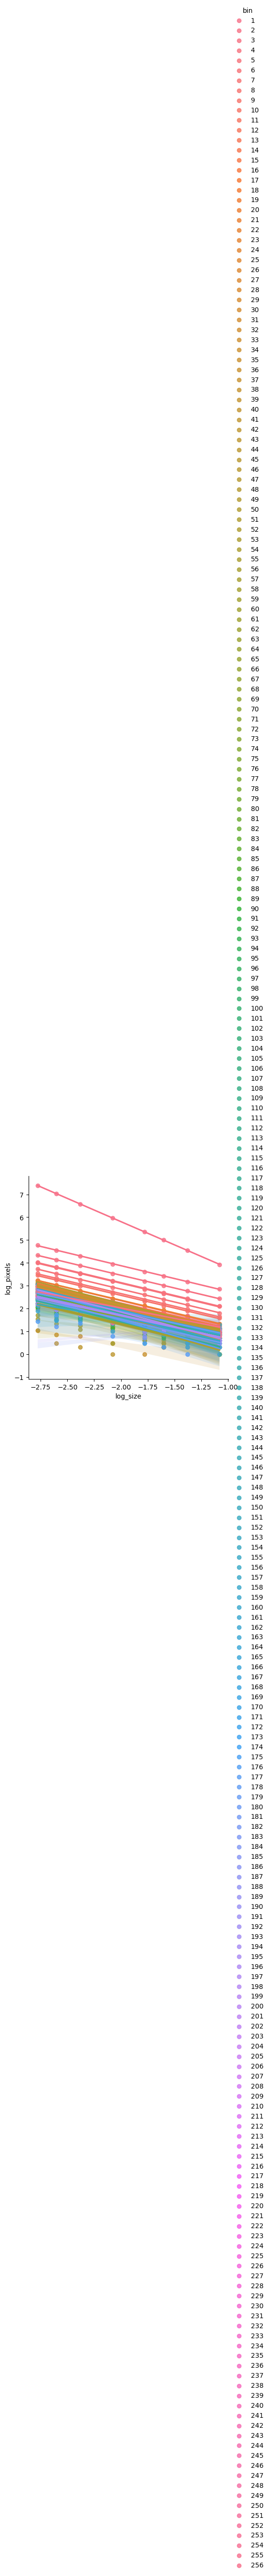

In [169]:
sns.lmplot(data=basin_df, x="log_size", y="log_pixels", hue="bin")

/home/jo/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jo/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jo/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_

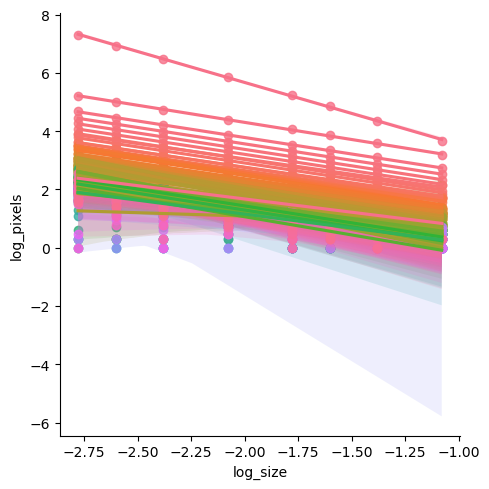

In [220]:
fig=sns.lmplot(data=basin_df, x="log_size", y="log_pixels", hue="bin", legend=False)

In [221]:
fig.savefig('dimension_example.png')

In [170]:
fract_dims = []
for i in range(1,257):
    bin_data = basin_df[basin_df['bin']==i]
    regression = linregress(x=bin_data['log_size'].array,y=bin_data['log_pixels'].array)
    slope = regression[0]
    fractal_dimension = -slope
    fract_dims.append(fractal_dimension)

/home/jo/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


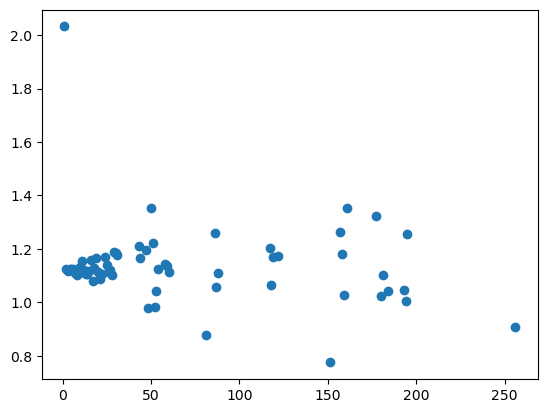

In [171]:
plt.scatter(np.arange(1,257),fract_dims)

(array([ 2.,  5., 34., 18.,  3.,  0.,  0.,  0.,  0.,  1.]),
 array([0.77472273, 0.90053555, 1.02634837, 1.15216119, 1.277974  ,
        1.40378682, 1.52959964, 1.65541245, 1.78122527, 1.90703809,
        2.0328509 ]),
 <BarContainer object of 10 artists>)

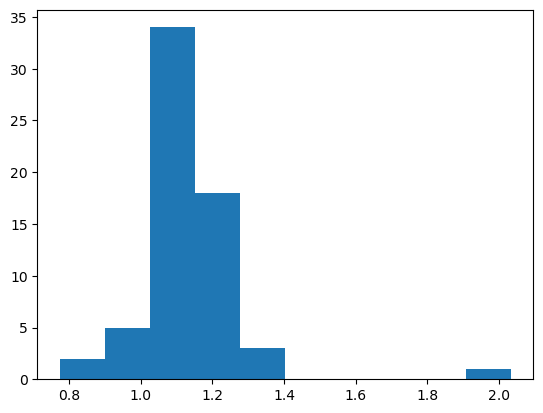

In [172]:
plt.hist(fract_dims)

nan